<a href="https://colab.research.google.com/github/Martin-Tello/CNN/blob/main/sem2VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install Keras-Applications

     |████████████████████████████████| 50 kB 3.2 MB/s 


In [ ]:
!pip install Keras-Preprocessing

In [ ]:
  !pip install keras_vggface

In [ ]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
width_shape = 224
height_shape = 224
num_classes = 30
epochs = 50
batch_size = 256

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_dir = '/content/drive/MyDrive/Hardcode/EntrenamientoSeminario2COLOR/TRAIN'  
validation_data_dir = '/content/drive/MyDrive/Hardcode/EntrenamientoSeminario2COLOR/VALIDATION'

In [ ]:
train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

Found 24000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.


In [ ]:
nb_train_samples = 24000
nb_validation_samples = 3000

In [ ]:
image_input = Input(shape=(width_shape, height_shape, 3))

model2 = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model2.summary()

last_layer = model2.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-3]:
	layer.trainable = False

custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

553476096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
93/93 [==============================] - 5580s 60s/step - loss: 9.0799 - accuracy: 0.0345 - val_loss: 7.7959 - val_accuracy: 0.0334
Epoch 2/50
93/93 [==============================] - 323s 3s/step - loss: 6.9922 - accuracy: 0.0379 - val_loss: 6.4014 - val_accuracy: 0.0362
Epoch 3/50
93/93 [==============================] - 326s 3s/step - loss: 5.9447 - accuracy: 0.0425 - val_loss: 5.5221 - val_accuracy: 0.0469
Epoch 4/50
93/93 [==============================] - 327s 4s/step - loss: 5.3107 - accuracy: 0.0517 - val_loss: 5.0474 - val_accuracy: 0.0604
Epoch 5/50
93/93 [==============================] - 325s 3s/step - loss: 4.8261 - accuracy: 0.0601 - val_loss: 4.7279 - val_accuracy: 0.0579
Epoch 6/50
93/93 [==============================] - 326s 4s/step - loss: 4.5120 - accuracy: 0.0668 - val_loss: 4.3769 - val_accuracy: 0.0689
Epoch 7/50
93/93 [==============================] - 325s 3s/step - loss: 4.2330 - accuracy: 0.0796 - val_loss: 4.2126 - val_accuracy: 0.0820
Epoch 8/50


In [ ]:
#grabar modelo con pesos entrenados
#PESOS DE PREENTRENADO, MÁS LO QUE ESTAMOS ENTRENANDO NOSOTROS
custom_model.save("VGG16TESTSINMASCARILLASEMINARIO2.h5")
#model_history.save("VGG16TESTSINMASCARILLASEMINARIO2.h5")

In [ ]:
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

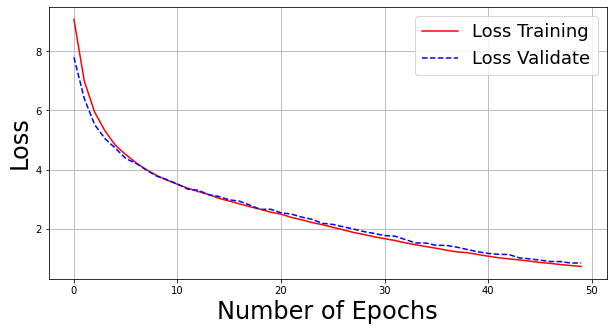

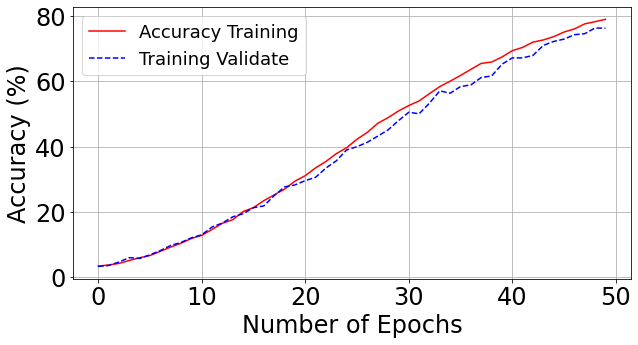

In [ ]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")



In [ ]:
!pip install mlxtend --upgrade

6


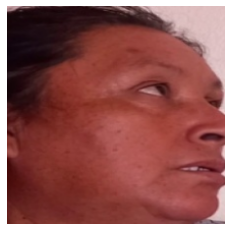

In [ ]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19',
'20','21','22','23','24','25','26','27','28','29','30' ]
#['AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN',
#AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART']

modelt = load_model("/content/VGG16TESTSINMASCARILLASEMINARIO2.h5")
#modelt = custom_model

imaget_path = "/content/drive/MyDrive/Hardcode/EntrenamientoSeminario2COLOR/TEST/ana_test_sin_cerca/image1002.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 3000 images belonging to 30 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

              precision    recall  f1-score   support

           0     0.8000    0.0400    0.0762       100
           1     0.0000    0.0000    0.0000       100
           2     0.3333    0.0200    0.0377       100
           3     0.4000    0.3800    0.3897       100
           4     0.1562    0.0500    0.0758       100
           5     0.2844    0.3100    0.2967       100
           6     0.0769    0.0100    0.0177       100
           7     0.1425    0.6600    0.2345       100
           8     0.6186    0.6000    0.6091       100
           9     0.3180    0.7600    0.4484       100
          10     0.0000    0.0000    0.0000       100
          11     0.5000    0.0300    0.0566       100
          12     0.0000    0.0000    0.0000       100
          13     0.8333    0.1000    0.1786       100
          14     0.2667    0.1200    0.1655       100
          15     0.0000    0.0000    0.0000       100
          16     0.2632    0.2000    0.2273       100
          17     0.7000    

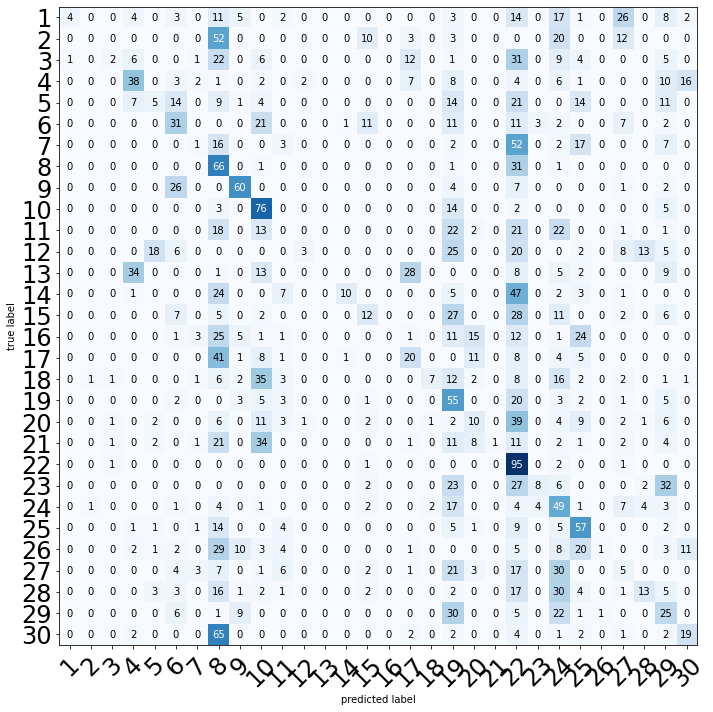

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'
,'23','24','25','26','27','28','29','30' ]
#['AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN',
#         'AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART']


test_data_dir = '/content/drive/MyDrive/Hardcode/EntrenamientoSeminario2COLOR/TEST'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("/content/VGG16TESTSINMASCARILLASEMINARIO2.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)
#cambiar a 10
plot_confusion_matrix(conf_mat=matc, figsize=(10,10), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))